In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

/home/robi/research/conda_envs/data/lib/python3.9/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


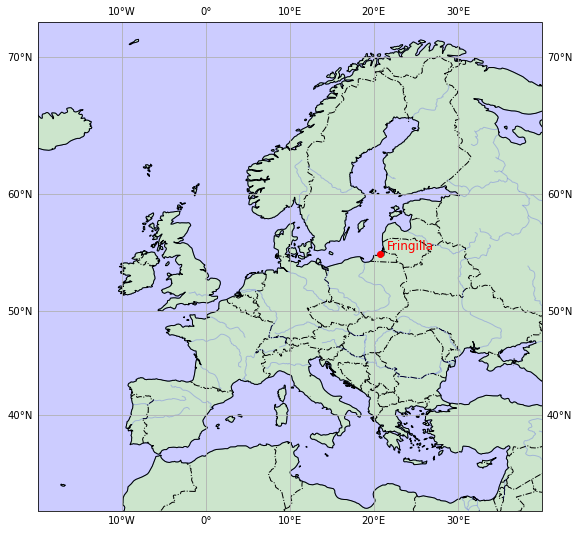

In [37]:
# map projection
proj = ccrs.Miller()
# data coordinate system
trans = ccrs.PlateCarree()

fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection=proj)
ax.set_extent([-20, 40, 30, 70])
#ax.stock_img()
ax.add_feature(cfeature.BORDERS, ls='-.')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, color='green', alpha=0.2)
ax.add_feature(cfeature.OCEAN, color='blue', alpha=0.2)
ax.add_feature(cfeature.RIVERS, color='blue', alpha=0.2)
ax.gridlines(draw_labels=True)

c = 'red'
ax.plot(20.73, 55.08, color=c, marker='o', transform=trans)
ax.text(21.5, 55.5, 'Fringilla', fontsize=12, color=c, transform=trans)
fig.savefig('../figs/map-europe.pdf', bbox_inches='tight')

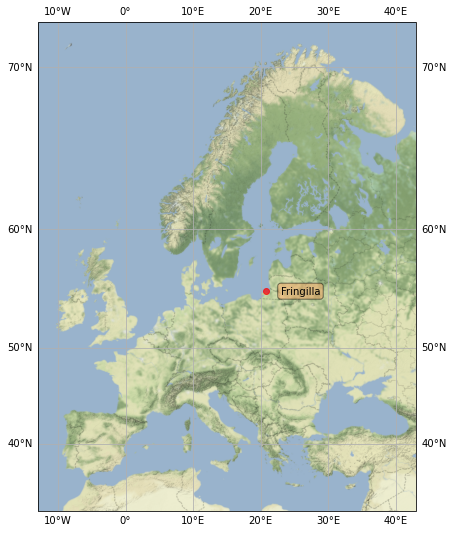

In [38]:
# USING MAP TILES
# https://scitools.org.uk/cartopy/docs/v0.15/examples/eyja_volcano.html

# create a Stamen Terrain instance
stamen_terrain = cimgt.Stamen('terrain-background') # watercolor is more artsy

fig = plt.figure(figsize=(16,9))
# create a GeoAxes in the tile's projection
ax = plt.axes(projection=stamen_terrain.crs)

# limit the extent of the map to a longitude/latitude range and add gridlines
ax.set_extent([-13, 43, 32, 70])
ax.gridlines(draw_labels=True)

# add the Stamen data at zoom level 5
ax.add_image(stamen_terrain, 5)

# add a marker for the Fringilla bird observatory
plt.plot(20.73, 55.08, marker='o', color='red', markersize=6,
         alpha=0.7, transform=ccrs.PlateCarree())

# Use the cartopy interface to create a matplotlib transform object
# for the PlateCarree coordinate system. We will use this along with
# matplotlib's offset_copy function to define a coordinate system which
# translates the text by 15 pixels to the right.
platecarree_transform = ccrs.PlateCarree()._as_mpl_transform(ax)
text_transform = offset_copy(platecarree_transform, units='dots', x=15)

# add text
plt.text(20.73, 55.08, 'Fringilla',
         verticalalignment='center', horizontalalignment='left',
         transform=text_transform,
         bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))

fig.savefig('../figs/map-europe-stamen-terrain.pdf', bbox_inches='tight')